# Question 2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from sklearn.datasets import load_breast_cancer
train, target = load_breast_cancer(return_X_y = True, as_frame = True)
target_pd = target.to_frame()
print("Type Train : ", type(train), "Type Target : ", type(target))

Type Train :  <class 'pandas.core.frame.DataFrame'> Type Target :  <class 'pandas.core.series.Series'>


*Statistical Summary of Train*

In [3]:
print(train.describe())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [4]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
print(train.head)

<bound method NDFrame.head of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean conca

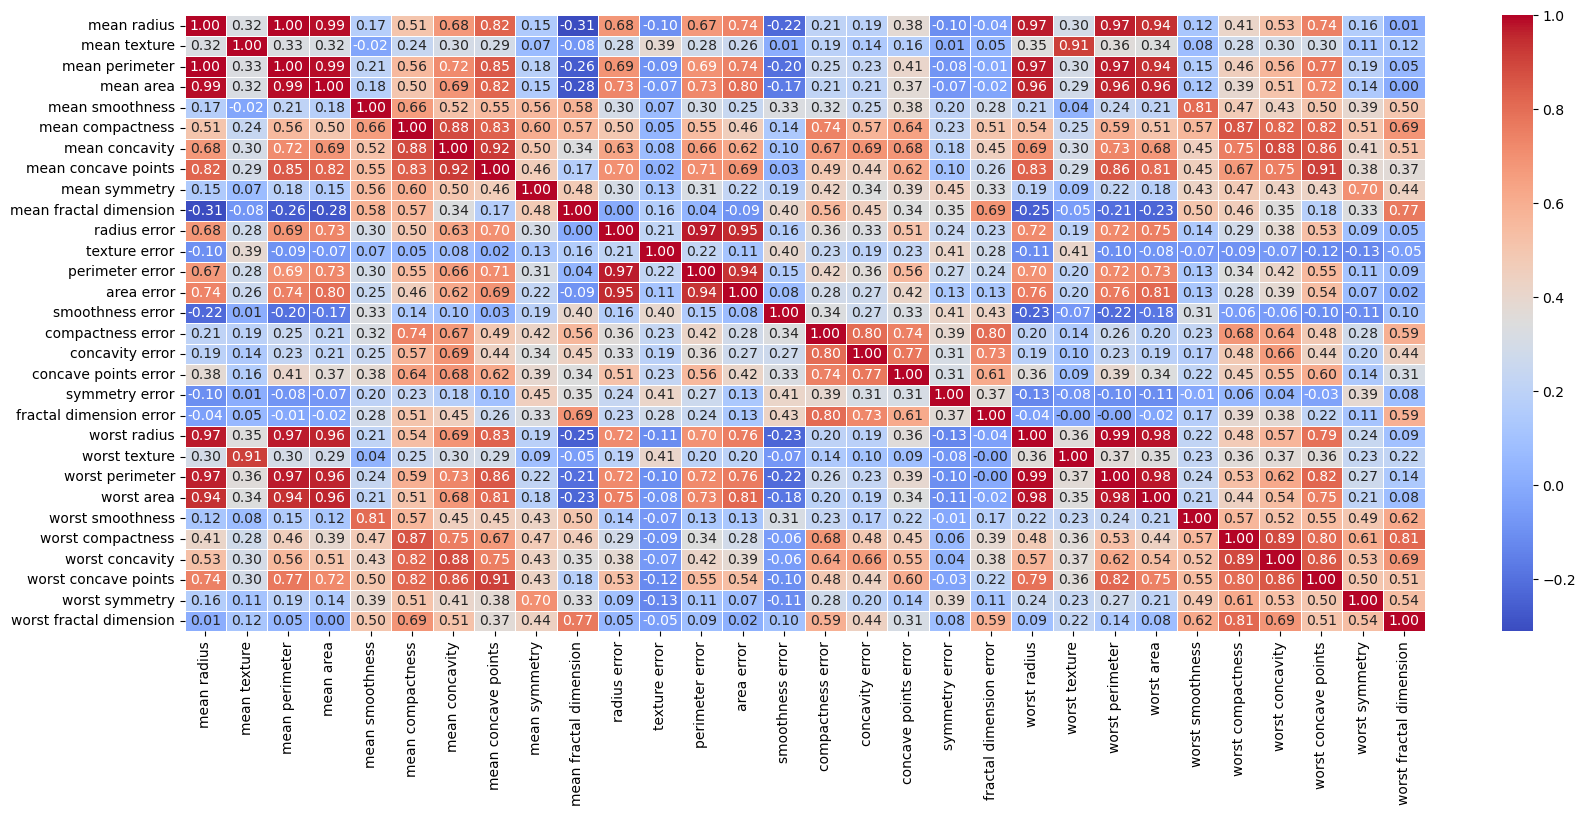

In [6]:
corr_matrix = train.corr()
# sns.set (rc = {'figure.figsize':(200, 100)})
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

Statistical Summary for Target Set

In [7]:
print(target.describe())

count    569.000000
mean       0.627417
std        0.483918
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64


In [8]:
print(target.info())

<class 'pandas.core.series.Series'>
RangeIndex: 569 entries, 0 to 568
Series name: target
Non-Null Count  Dtype
--------------  -----
569 non-null    int32
dtypes: int32(1)
memory usage: 2.4 KB
None


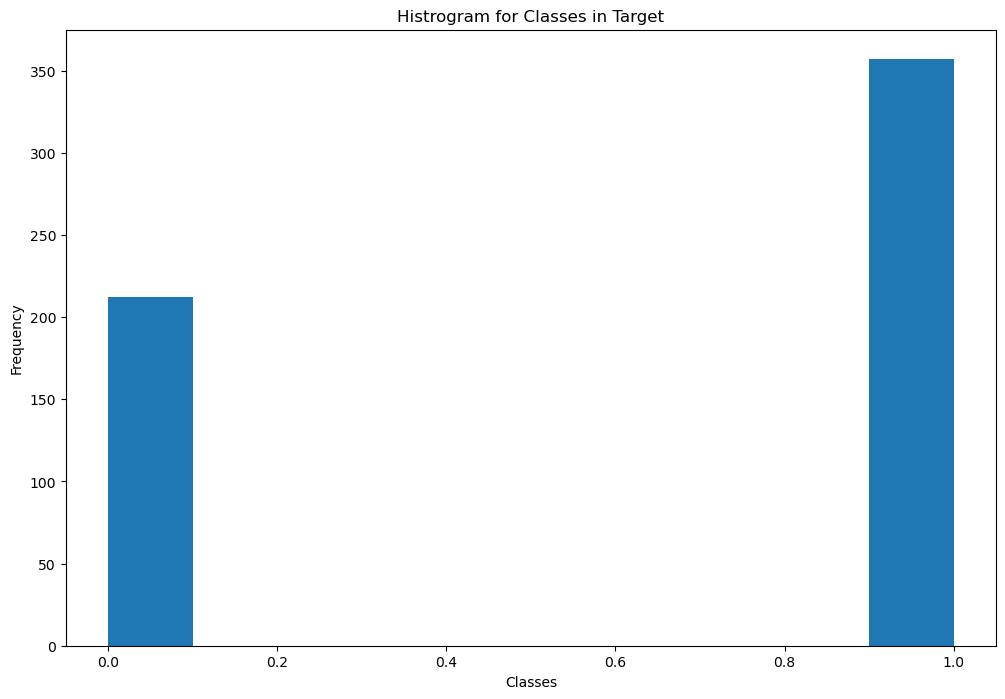

In [9]:
plt.figure(figsize = (12, 8))
plt.hist(target_pd)
plt.title("Histrogram for Classes in Target")
plt.ylabel("Frequency")
plt.xlabel("Classes")
plt.show()

In [10]:
print(target.head(20))

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    1
Name: target, dtype: int32


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.8, random_state = 42)

Firstly, Using Standard Scaler 

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier()
scaler = StandardScaler()
Pipeline = Pipeline([('scaler', scaler), ('dt', dt)])

#Paramerters for Grid Search
parameters = {
    'dt__criterion' : ['gini', 'entropy', 'log_loss'],
    'dt__splitter' : ['best', 'random'],
    'dt__max_depth' : [None, 10, 20 , 5, 8, 30],
    'dt__max_features' : ["auto", None, "log2", 'sqrt'],
    'dt__max_leaf_nodes' : [None, 1, 2, 5, 8, 10],
    'dt__ccp_alpha' : [0.1, 0.001, 0.001, 0.02]
}
grid_pipe = GridSearchCV(Pipeline, parameters)
grid_pipe.fit(X_train, y_train)
grid_pipe.best_params_


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
6480 fits failed out of a total of 17280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4320 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estima

{'dt__ccp_alpha': 0.001,
 'dt__criterion': 'log_loss',
 'dt__max_depth': None,
 'dt__max_features': 'log2',
 'dt__max_leaf_nodes': 5,
 'dt__splitter': 'best'}

Implementing a Decision Tree Classifier with the Best Parameters using KFold CrossValidation

In [13]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

dt_b = DecisionTreeClassifier(random_state = 42, ccp_alpha=0.001, criterion='log_loss', max_depth=5, max_leaf_nodes=10, splitter='best')
k_fold = KFold(n_splits = 5)
scores = cross_val_score(dt_b, X_test, y_test, cv = k_fold)
print("\n\t\t\tCross Validation Accuracy Scores: \t\t\n", scores)
print("\n\t\t\tAverage K Folds Cross Validation Accuracy Score\t\t\t\n", scores.mean())


			Cross Validation Accuracy Scores: 		
 [0.94565217 0.94505495 0.94505495 0.91208791 0.94505495]

			Average K Folds Cross Validation Accuracy Score			
 0.938580984233158


Making the Predictions

In [14]:
from sklearn.metrics import classification_report
y_prd = cross_val_predict(dt_b, X_test, y_test, cv = k_fold)
print(classification_report(y_test, y_prd, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       166
           1       0.96      0.94      0.95       290

    accuracy                           0.94       456
   macro avg       0.93      0.94      0.93       456
weighted avg       0.94      0.94      0.94       456



Building the Confusion Matrix

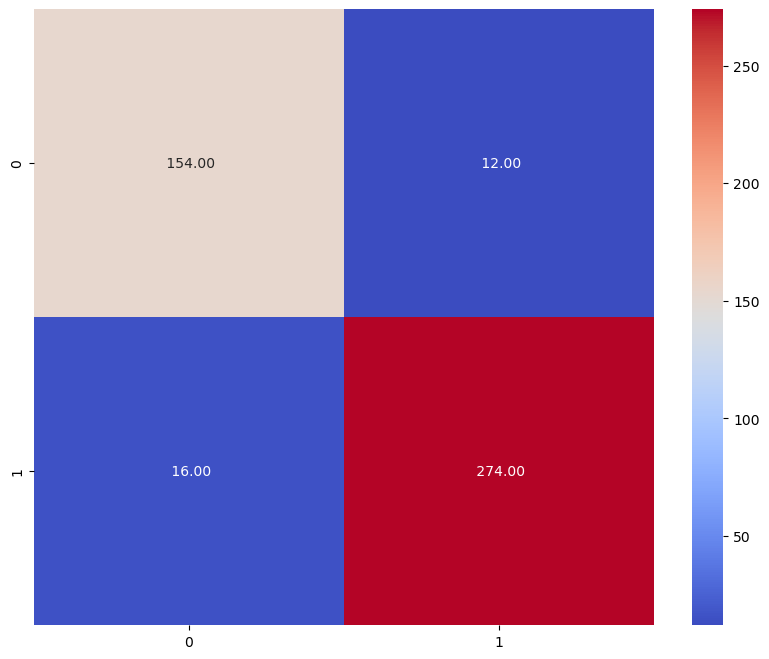

In [15]:
from sklearn.metrics import confusion_matrix
corr_matrix = train.corr()
plt.figure(figsize=(10, 8))
conf_mat = confusion_matrix(y_test, y_prd)
sns.heatmap(conf_mat, annot = True, cmap = 'coolwarm', fmt = ' .2f')
plt.show()

Plotting the ROC Curve

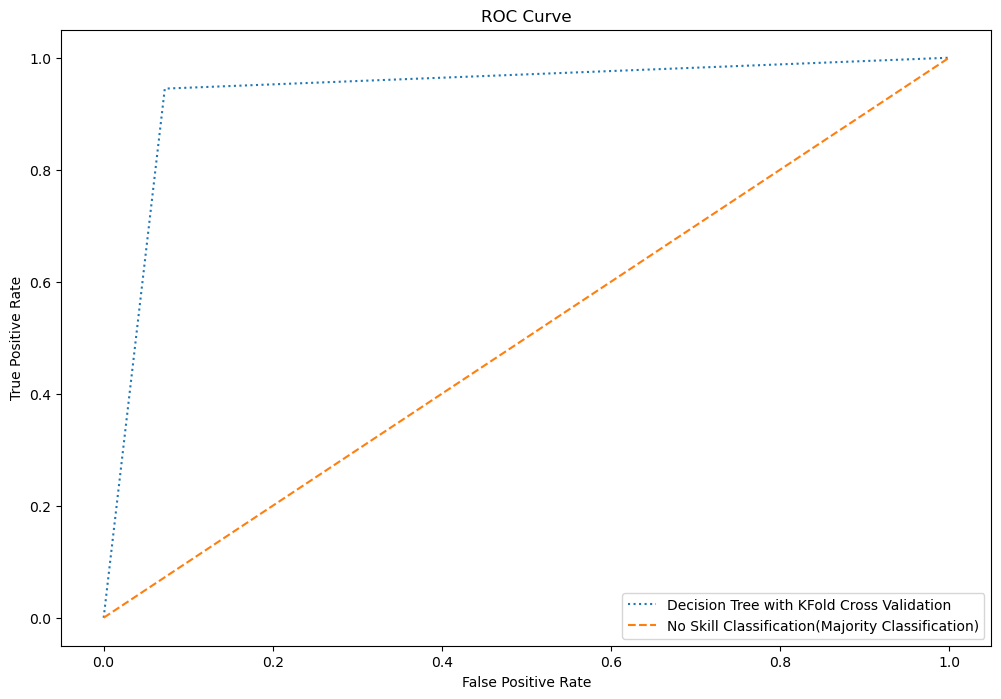

In [16]:
from sklearn.metrics import roc_curve

dt_fpr, dt_tpr, _ = roc_curve(y_test, y_prd)
ns_prob = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_prob)
plt.figure(figsize=(12, 8))
plt.plot(dt_fpr, dt_tpr, ls = ':',label = "Decision Tree with KFold Cross Validation")
plt.plot(ns_fpr, ns_tpr, ls = '--', label = "No Skill Classification(Majority Classification)")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [17]:
from sklearn.metrics import roc_auc_score
auc_dt = roc_auc_score(y_test, y_prd)
print("\n\t\t\tDecision Tree: ROC AUC = ", auc_dt, '\t\t\t\n')
auc_ns = roc_auc_score(y_test, ns_prob)
print("\n\t\t\tNo SKill: AUC ROC = ", auc_ns, '\t\t\t\n')


			Decision Tree: ROC AUC =  0.9362692147901952 			


			No SKill: AUC ROC =  0.5 			



Implementing a Decision Tree Classifier with Best Parameters using Stratified K Fold Split

In [18]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict

dt_b = DecisionTreeClassifier(random_state = 42, ccp_alpha=0.001, criterion='log_loss', max_depth=5, max_leaf_nodes=10, splitter='best')
sk_fold = StratifiedKFold(n_splits = 5)
scores = cross_val_score(dt_b, X_test, y_test, cv = sk_fold)
print("\n\t\t\tCross Validation Accuracy Scores: \t\t\n", scores)
print("\n\t\t\tAverage K Folds Cross Validation Accuracy Score\t\t\t\n", scores.mean())


			Cross Validation Accuracy Scores: 		
 [0.94565217 0.9010989  0.94505495 0.91208791 0.94505495]

			Average K Folds Cross Validation Accuracy Score			
 0.9297897754419493


In [19]:
from sklearn.metrics import classification_report
y_prd = cross_val_predict(dt_b, X_test, y_test, cv = sk_fold)
print(classification_report(y_test, y_prd, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       166
           1       0.95      0.93      0.94       290

    accuracy                           0.93       456
   macro avg       0.92      0.93      0.92       456
weighted avg       0.93      0.93      0.93       456



Building the Confusion Matrix

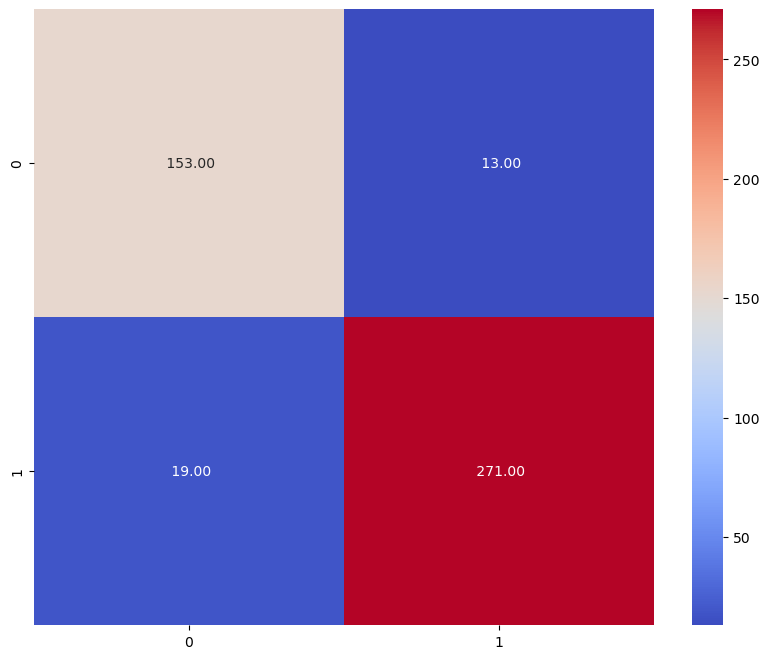

In [20]:
from sklearn.metrics import confusion_matrix
corr_matrix = train.corr()
plt.figure(figsize=(10, 8))
conf_mat = confusion_matrix(y_test, y_prd)
sns.heatmap(conf_mat, annot = True, cmap = 'coolwarm', fmt = ' .2f')
plt.show()

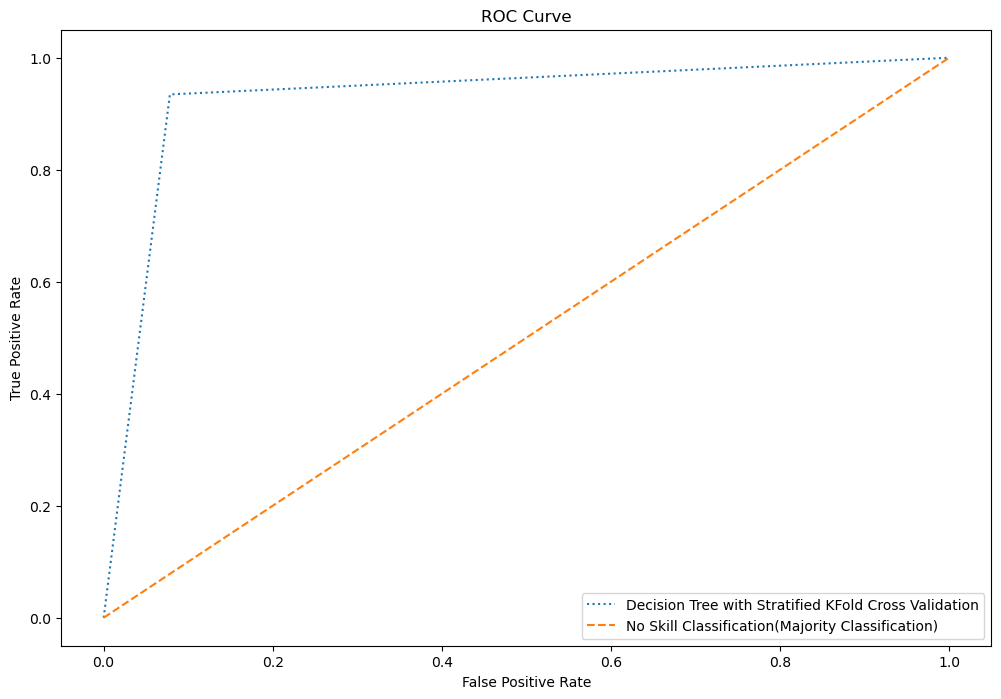


			Decision Tree: ROC AUC =  0.9280847528043208 			


			No SKill: AUC ROC =  0.5 			



In [21]:
from sklearn.metrics import roc_curve

dt_fpr, dt_tpr, _ = roc_curve(y_test, y_prd)
ns_prob = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_prob)
plt.figure(figsize=(12, 8))
plt.plot(dt_fpr, dt_tpr, ls = ':',label = "Decision Tree with Stratified KFold Cross Validation")
plt.plot(ns_fpr, ns_tpr, ls = '--', label = "No Skill Classification(Majority Classification)")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


from sklearn.metrics import roc_auc_score
auc_dt = roc_auc_score(y_test, y_prd)
print("\n\t\t\tDecision Tree: ROC AUC = ", auc_dt, '\t\t\t\n')
auc_ns = roc_auc_score(y_test, ns_prob)
print("\n\t\t\tNo SKill: AUC ROC = ", auc_ns, '\t\t\t\n')


Using Robust Scaler

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
6480 fits failed out of a total of 17280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4320 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estima


			Cross Validation Accuracy Scores: 		
 [0.94565217 0.94505495 0.94505495 0.91208791 0.94505495]

			Average K Folds Cross Validation Accuracy Score			
 0.938580984233158
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       166
           1       0.96      0.94      0.95       290

    accuracy                           0.94       456
   macro avg       0.93      0.94      0.93       456
weighted avg       0.94      0.94      0.94       456



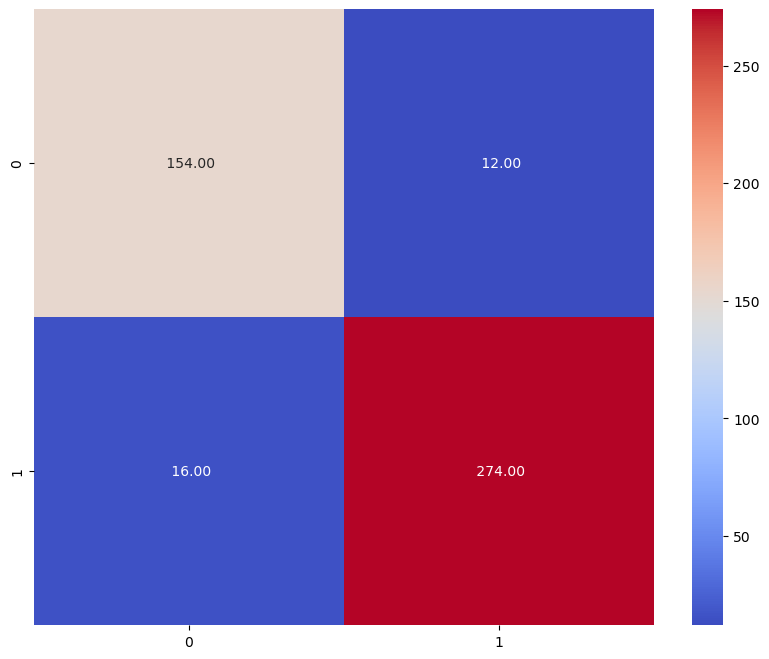

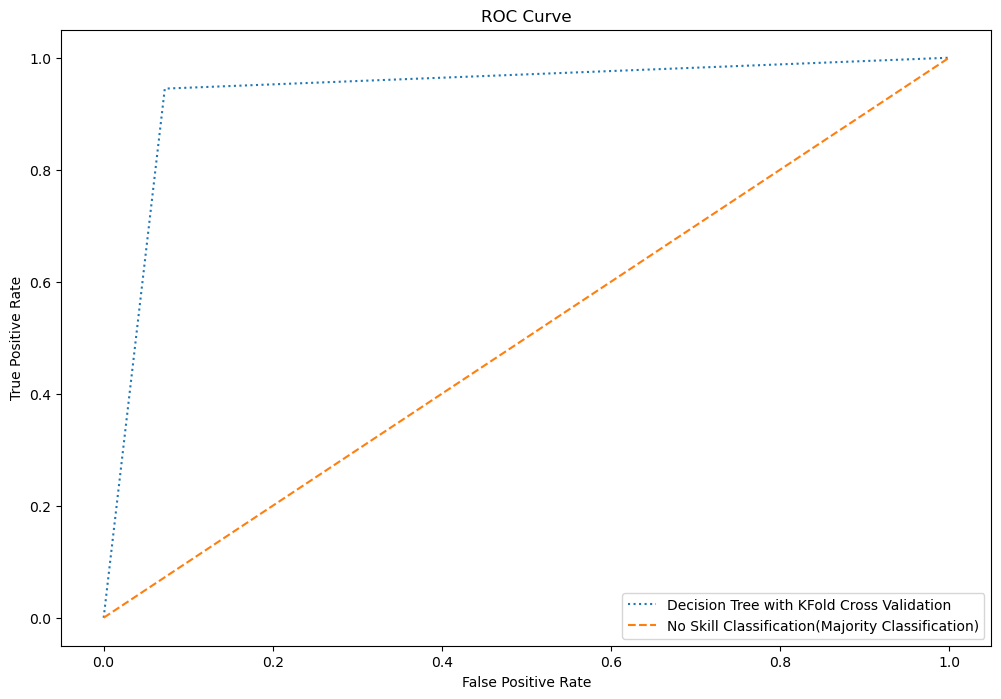


			Decision Tree: ROC AUC =  0.9362692147901952 			


			No SKill: AUC ROC =  0.5 			


			Cross Validation Accuracy Scores: 		
 [0.94565217 0.9010989  0.94505495 0.91208791 0.94505495]

			Average K Folds Cross Validation Accuracy Score			
 0.9297897754419493
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       166
           1       0.95      0.93      0.94       290

    accuracy                           0.93       456
   macro avg       0.92      0.93      0.92       456
weighted avg       0.93      0.93      0.93       456



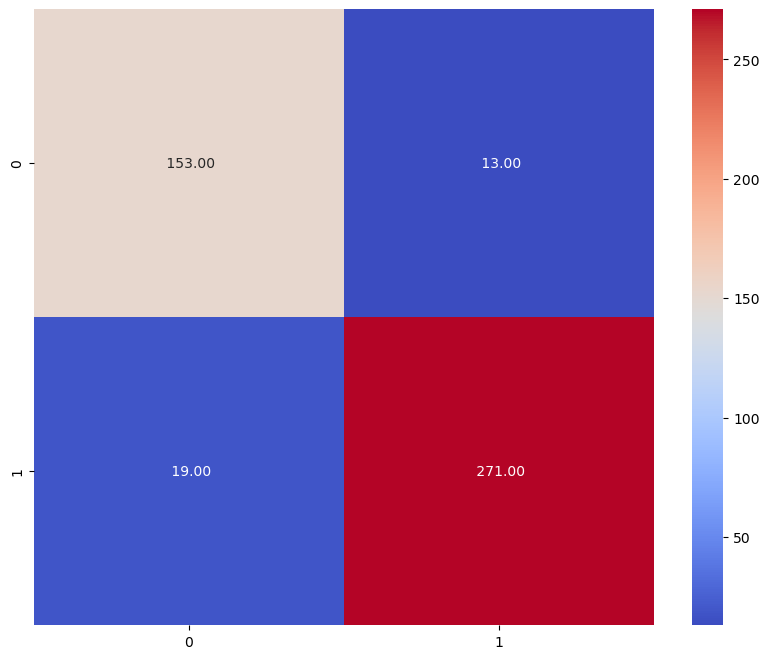

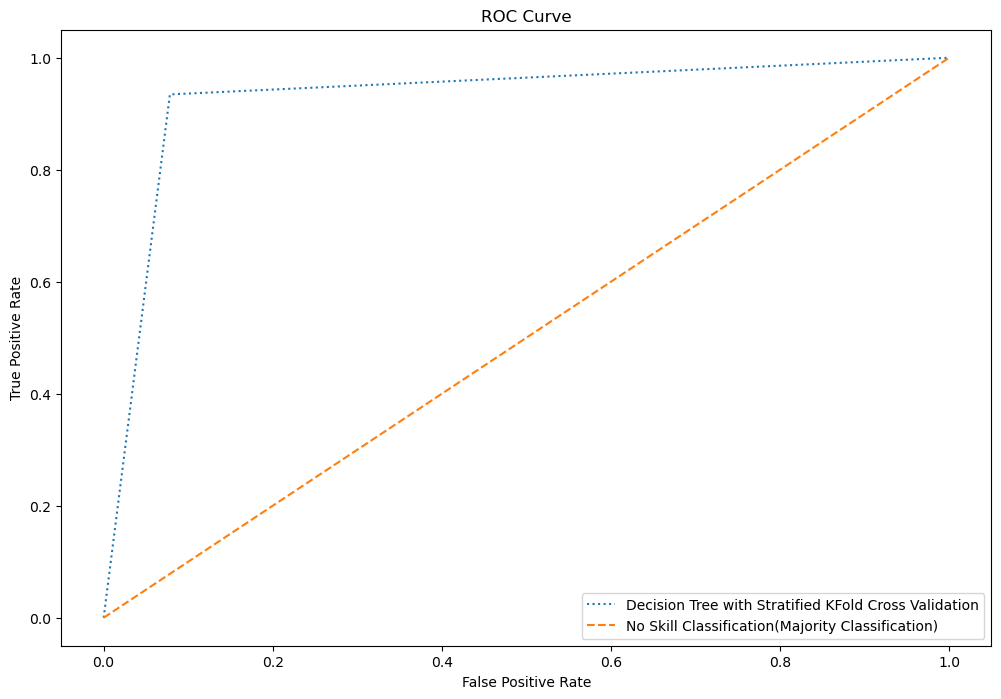


			Decision Tree: ROC AUC =  0.9280847528043208 			


			No SKill: AUC ROC =  0.5 			



In [22]:
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
rscaler = RobustScaler()
Pipeline = Pipeline([('scaler', rscaler), ('dt', dt)])

#Paramerters for Grid Search
parameters = {
    'dt__criterion' : ['gini', 'entropy', 'log_loss'],
    'dt__splitter' : ['best', 'random'],
    'dt__max_depth' : [None, 10, 20 , 5, 8, 30],
    'dt__max_features' : ["auto", None, "log2", 'sqrt'],
    'dt__max_leaf_nodes' : [None, 1, 2, 5, 8, 10],
    'dt__ccp_alpha' : [0.1, 0.001, 0.001, 0.02]
}
grid_pipe = GridSearchCV(Pipeline, parameters)
grid_pipe.fit(X_train, y_train)
grid_pipe.best_params_

from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

dt_b = DecisionTreeClassifier(random_state = 42, ccp_alpha=0.001, criterion='log_loss', max_depth=5, max_leaf_nodes=10, splitter='best')
k_fold = KFold(n_splits = 5)
scores = cross_val_score(dt_b, X_test, y_test, cv = k_fold)
print("\n\t\t\tCross Validation Accuracy Scores: \t\t\n", scores)
print("\n\t\t\tAverage K Folds Cross Validation Accuracy Score\t\t\t\n", scores.mean())

from sklearn.metrics import classification_report
y_prd = cross_val_predict(dt_b, X_test, y_test, cv = k_fold)
print(classification_report(y_test, y_prd, labels = [0, 1]))

# Building the Confusion Matrix

from sklearn.metrics import confusion_matrix
corr_matrix = train.corr()
plt.figure(figsize=(10, 8))
conf_mat = confusion_matrix(y_test, y_prd)
sns.heatmap(conf_mat, annot = True, cmap = 'coolwarm', fmt = ' .2f')
plt.show()

# Plotting the ROC Curve

from sklearn.metrics import roc_curve

dt_fpr, dt_tpr, _ = roc_curve(y_test, y_prd)
ns_prob = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_prob)
plt.figure(figsize=(12, 8))
plt.plot(dt_fpr, dt_tpr, ls = ':',label = "Decision Tree with KFold Cross Validation")
plt.plot(ns_fpr, ns_tpr, ls = '--', label = "No Skill Classification(Majority Classification)")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


from sklearn.metrics import roc_auc_score
auc_dt = roc_auc_score(y_test, y_prd)
print("\n\t\t\tDecision Tree: ROC AUC = ", auc_dt, '\t\t\t\n')
auc_ns = roc_auc_score(y_test, ns_prob)
print("\n\t\t\tNo SKill: AUC ROC = ", auc_ns, '\t\t\t\n')

# Implementing a Decision Tree Classifier with Best Parameters using Stratified K Fold Split

from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict

dt_b = DecisionTreeClassifier(random_state = 42, ccp_alpha=0.001, criterion='log_loss', max_depth=5, max_leaf_nodes=10, splitter='best')
sk_fold = StratifiedKFold(n_splits = 5)
scores = cross_val_score(dt_b, X_test, y_test, cv = sk_fold)
print("\n\t\t\tCross Validation Accuracy Scores: \t\t\n", scores)
print("\n\t\t\tAverage K Folds Cross Validation Accuracy Score\t\t\t\n", scores.mean())

from sklearn.metrics import classification_report
y_prd = cross_val_predict(dt_b, X_test, y_test, cv = sk_fold)
print(classification_report(y_test, y_prd, labels = [0, 1]))

# Building the Confusion Matrix

from sklearn.metrics import confusion_matrix
corr_matrix = train.corr()
plt.figure(figsize=(10, 8))
conf_mat = confusion_matrix(y_test, y_prd)
sns.heatmap(conf_mat, annot = True, cmap = 'coolwarm', fmt = ' .2f')
plt.show()

from sklearn.metrics import roc_curve

dt_fpr, dt_tpr, _ = roc_curve(y_test, y_prd)
ns_prob = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_prob)
plt.figure(figsize=(12, 8))
plt.plot(dt_fpr, dt_tpr, ls = ':',label = "Decision Tree with Stratified KFold Cross Validation")
plt.plot(ns_fpr, ns_tpr, ls = '--', label = "No Skill Classification(Majority Classification)")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


from sklearn.metrics import roc_auc_score
auc_dt = roc_auc_score(y_test, y_prd)
print("\n\t\t\tDecision Tree: ROC AUC = ", auc_dt, '\t\t\t\n')
auc_ns = roc_auc_score(y_test, ns_prob)
print("\n\t\t\tNo SKill: AUC ROC = ", auc_ns, '\t\t\t\n')





**Using SVM**

Using Robust Scaler

*Finding Best Set of Parameters*

In [24]:
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

svc = SVC()
rscaler = RobustScaler()
Pipeline = Pipeline([('scaler', rscaler), ('svc', svc)])

#Paramerters for Grid Search
parameters = {
    'svc__kernel' : ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
    'svc__degree' : [2, 3, 4, 5, 6, 7, 8],
    'svc__shrinking' : [True, False],
    'svc__tol' : [0.01, 0.001, 0.001],
    'svc__cache_size' : [200, 300, 400, 500, 600]
}
grid_pipe = GridSearchCV(Pipeline, parameters)
grid_pipe.fit(X_train, y_train)
grid_pipe.best_params_

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1050 fits failed out of a total of 5250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
630 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estimato

{'svc__cache_size': 200,
 'svc__degree': 2,
 'svc__kernel': 'rbf',
 'svc__shrinking': True,
 'svc__tol': 0.01}


			Cross Validation Accuracy Scores: 		
 [0.92391304 0.95604396 0.89010989 0.93406593 0.87912088]

			Average K Folds Cross Validation Accuracy Score			
 0.916650740563784
              precision    recall  f1-score   support

           0       0.97      0.80      0.87       166
           1       0.89      0.99      0.94       290

    accuracy                           0.92       456
   macro avg       0.93      0.89      0.91       456
weighted avg       0.92      0.92      0.91       456



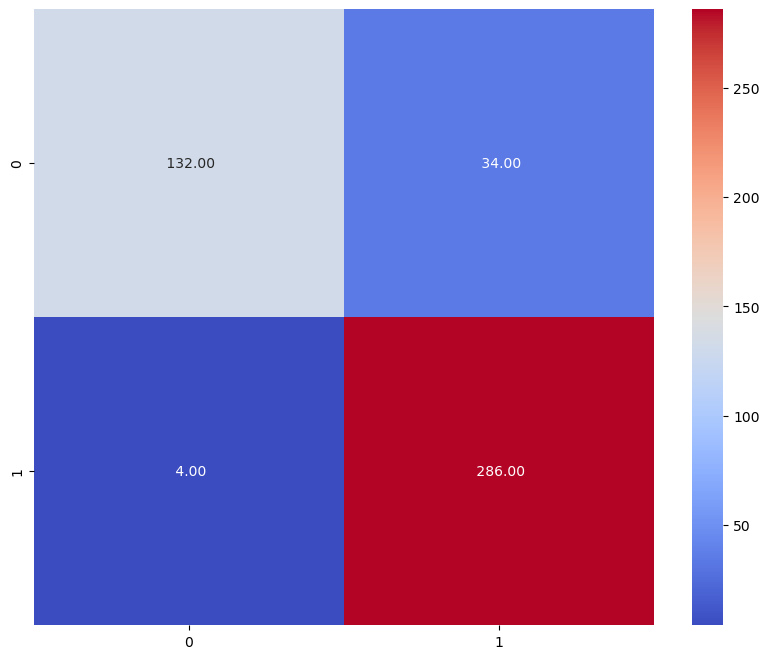

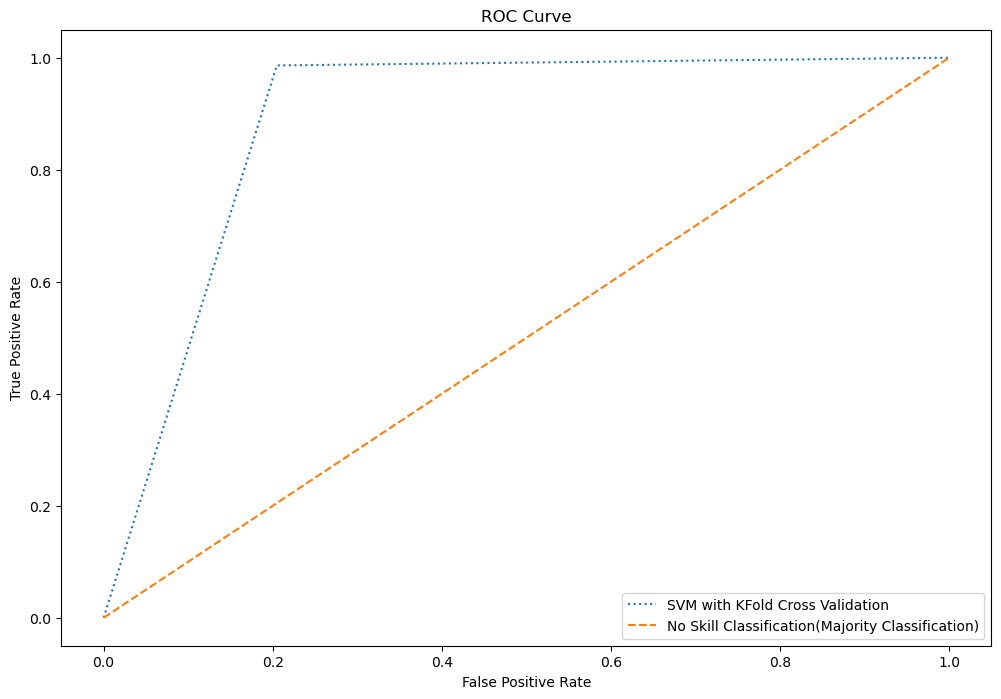


			Decision Tree: ROC AUC =  0.8906938097216452 			


			No SKill: AUC ROC =  0.5 			


			Cross Validation Accuracy Scores: 		
 [0.92391304 0.94505495 0.89010989 0.94505495 0.87912088]

			Average K Folds Cross Validation Accuracy Score			
 0.916650740563784
              precision    recall  f1-score   support

           0       0.97      0.80      0.87       166
           1       0.89      0.99      0.94       290

    accuracy                           0.92       456
   macro avg       0.93      0.89      0.91       456
weighted avg       0.92      0.92      0.91       456



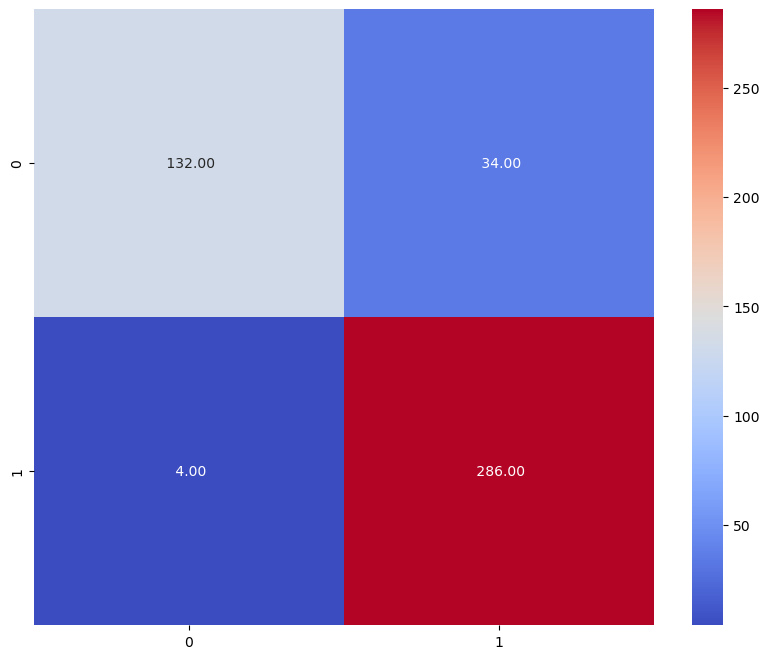

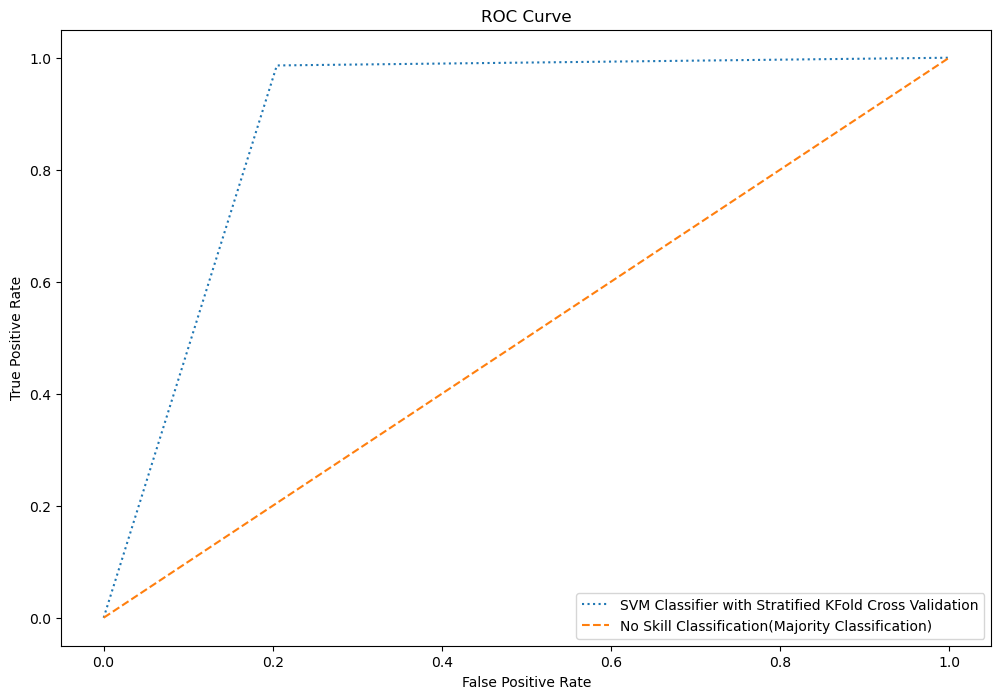


			SVM Classifier: ROC AUC =  0.8906938097216452 			


			No SKill: AUC ROC =  0.5 			



In [26]:

from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

dt_b = SVC(random_state = 42, cache_size=200, degree=2, kernel='rbf', shrinking=True, tol = 0.01)
k_fold = KFold(n_splits = 5)
scores = cross_val_score(dt_b, X_test, y_test, cv = k_fold)
print("\n\t\t\tCross Validation Accuracy Scores: \t\t\n", scores)
print("\n\t\t\tAverage K Folds Cross Validation Accuracy Score\t\t\t\n", scores.mean())

from sklearn.metrics import classification_report
y_prd = cross_val_predict(dt_b, X_test, y_test, cv = k_fold)
print(classification_report(y_test, y_prd, labels = [0, 1]))

# Building the Confusion Matrix

from sklearn.metrics import confusion_matrix
corr_matrix = train.corr()
plt.figure(figsize=(10, 8))
conf_mat = confusion_matrix(y_test, y_prd)
sns.heatmap(conf_mat, annot = True, cmap = 'coolwarm', fmt = ' .2f')
plt.show()

# Plotting the ROC Curve

from sklearn.metrics import roc_curve

dt_fpr, dt_tpr, _ = roc_curve(y_test, y_prd)
ns_prob = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_prob)
plt.figure(figsize=(12, 8))
plt.plot(dt_fpr, dt_tpr, ls = ':',label = "SVM with KFold Cross Validation")
plt.plot(ns_fpr, ns_tpr, ls = '--', label = "No Skill Classification(Majority Classification)")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


from sklearn.metrics import roc_auc_score
auc_dt = roc_auc_score(y_test, y_prd)
print("\n\t\t\tDecision Tree: ROC AUC = ", auc_dt, '\t\t\t\n')
auc_ns = roc_auc_score(y_test, ns_prob)
print("\n\t\t\tNo SKill: AUC ROC = ", auc_ns, '\t\t\t\n')

# Implementing a Decision Tree Classifier with Best Parameters using Stratified K Fold Split

from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict

dt_b = SVC(random_state = 42, cache_size=200, degree=2, kernel='rbf', shrinking=True, tol = 0.01)
sk_fold = StratifiedKFold(n_splits = 5)
scores = cross_val_score(dt_b, X_test, y_test, cv = sk_fold)
print("\n\t\t\tCross Validation Accuracy Scores: \t\t\n", scores)
print("\n\t\t\tAverage K Folds Cross Validation Accuracy Score\t\t\t\n", scores.mean())

from sklearn.metrics import classification_report
y_prd = cross_val_predict(dt_b, X_test, y_test, cv = sk_fold)
print(classification_report(y_test, y_prd, labels = [0, 1]))

# Building the Confusion Matrix

from sklearn.metrics import confusion_matrix
corr_matrix = train.corr()
plt.figure(figsize=(10, 8))
conf_mat = confusion_matrix(y_test, y_prd)
sns.heatmap(conf_mat, annot = True, cmap = 'coolwarm', fmt = ' .2f')
plt.show()

from sklearn.metrics import roc_curve

dt_fpr, dt_tpr, _ = roc_curve(y_test, y_prd)
ns_prob = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_prob)
plt.figure(figsize=(12, 8))
plt.plot(dt_fpr, dt_tpr, ls = ':',label = "SVM Classifier with Stratified KFold Cross Validation")
plt.plot(ns_fpr, ns_tpr, ls = '--', label = "No Skill Classification(Majority Classification)")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


from sklearn.metrics import roc_auc_score
auc_dt = roc_auc_score(y_test, y_prd)
print("\n\t\t\tSVM Classifier: ROC AUC = ", auc_dt, '\t\t\t\n')
auc_ns = roc_auc_score(y_test, ns_prob)
print("\n\t\t\tNo SKill: AUC ROC = ", auc_ns, '\t\t\t\n')





*Using Standard Scler*

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

svc = SVC()
scaler = StandardScaler()
Pipeline = Pipeline([('scaler', scaler), ('svc', svc)])

#Paramerters for Grid Search
parameters = {
    'svc__kernel' : ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
    'svc__degree' : [2, 3, 4, 5, 6, 7, 8],
    'svc__shrinking' : [True, False],
    'svc__tol' : [0.01, 0.001, 0.001],
    'svc__cache_size' : [200, 300, 400, 500, 600]
}
grid_pipe = GridSearchCV(Pipeline, parameters)
grid_pipe.fit(X_train, y_train)
grid_pipe.best_params_

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1050 fits failed out of a total of 5250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
630 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estimato

{'svc__cache_size': 200,
 'svc__degree': 2,
 'svc__kernel': 'linear',
 'svc__shrinking': True,
 'svc__tol': 0.01}


			Cross Validation Accuracy Scores: 		
 [0.92391304 0.95604396 0.89010989 0.93406593 0.87912088]

			Average K Folds Cross Validation Accuracy Score			
 0.916650740563784
              precision    recall  f1-score   support

           0       0.97      0.80      0.87       166
           1       0.89      0.99      0.94       290

    accuracy                           0.92       456
   macro avg       0.93      0.89      0.91       456
weighted avg       0.92      0.92      0.91       456



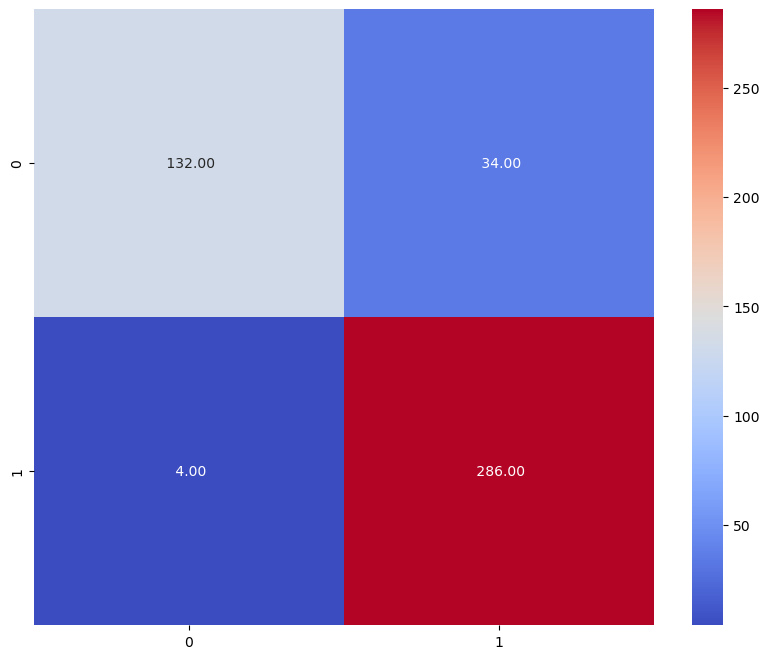

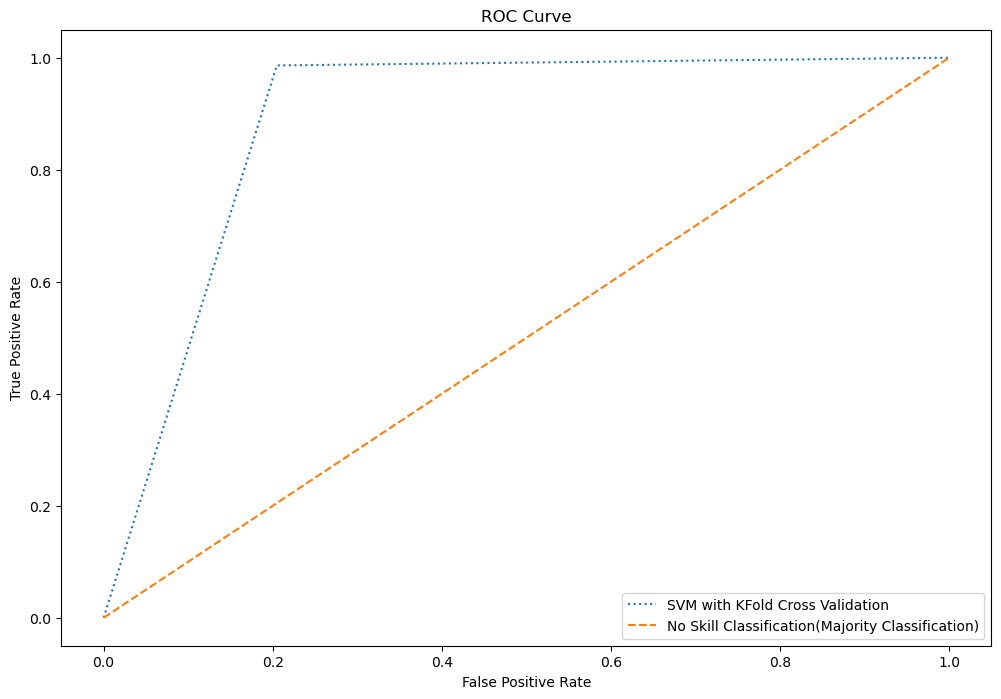


			Decision Tree: ROC AUC =  0.8906938097216452 			


			No SKill: AUC ROC =  0.5 			


			Cross Validation Accuracy Scores: 		
 [0.92391304 0.94505495 0.89010989 0.94505495 0.87912088]

			Average K Folds Cross Validation Accuracy Score			
 0.916650740563784
              precision    recall  f1-score   support

           0       0.97      0.80      0.87       166
           1       0.89      0.99      0.94       290

    accuracy                           0.92       456
   macro avg       0.93      0.89      0.91       456
weighted avg       0.92      0.92      0.91       456



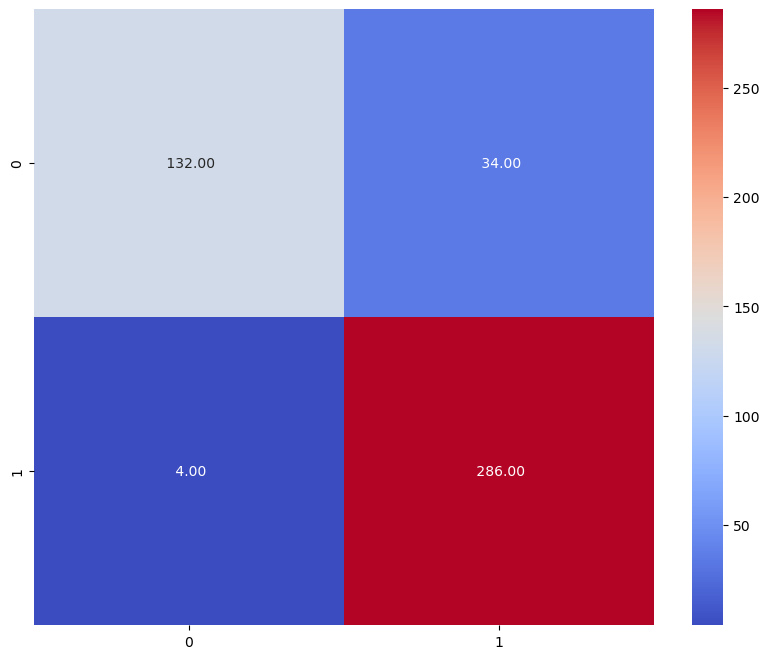

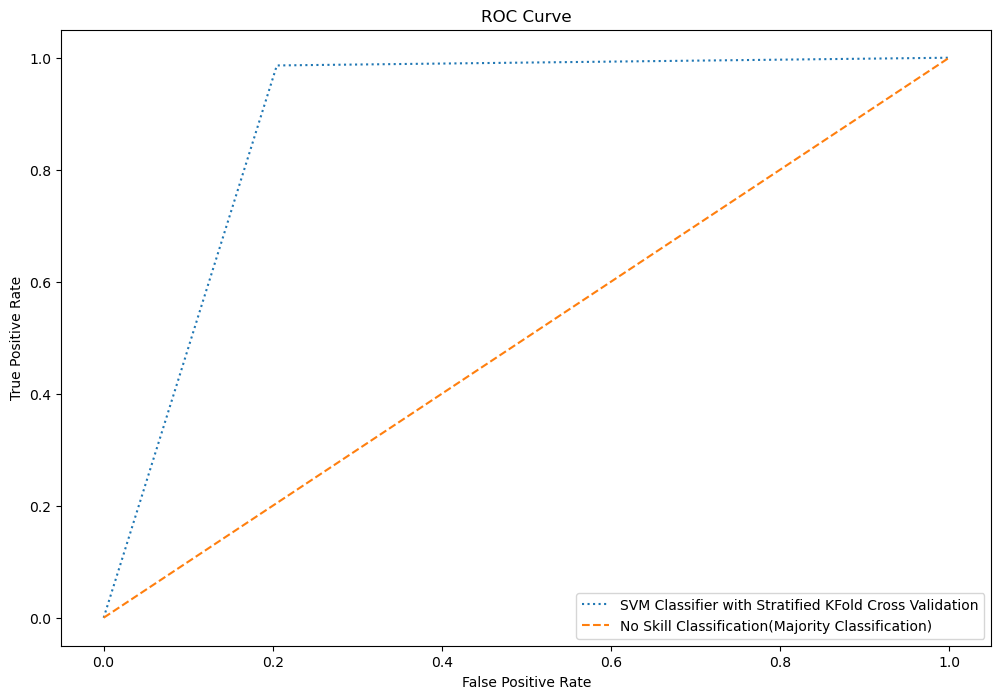


			SVM Classifier: ROC AUC =  0.8906938097216452 			


			No SKill: AUC ROC =  0.5 			



In [28]:

from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

dt_b = SVC(random_state = 42, cache_size=200, degree=2, kernel='rbf', shrinking=True, tol = 0.01)
k_fold = KFold(n_splits = 5)
scores = cross_val_score(dt_b, X_test, y_test, cv = k_fold)
print("\n\t\t\tCross Validation Accuracy Scores: \t\t\n", scores)
print("\n\t\t\tAverage K Folds Cross Validation Accuracy Score\t\t\t\n", scores.mean())

from sklearn.metrics import classification_report
y_prd = cross_val_predict(dt_b, X_test, y_test, cv = k_fold)
print(classification_report(y_test, y_prd, labels = [0, 1]))

# Building the Confusion Matrix

from sklearn.metrics import confusion_matrix
corr_matrix = train.corr()
plt.figure(figsize=(10, 8))
conf_mat = confusion_matrix(y_test, y_prd)
sns.heatmap(conf_mat, annot = True, cmap = 'coolwarm', fmt = ' .2f')
plt.show()

# Plotting the ROC Curve

from sklearn.metrics import roc_curve

dt_fpr, dt_tpr, _ = roc_curve(y_test, y_prd)
ns_prob = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_prob)
plt.figure(figsize=(12, 8))
plt.plot(dt_fpr, dt_tpr, ls = ':',label = "SVM with KFold Cross Validation")
plt.plot(ns_fpr, ns_tpr, ls = '--', label = "No Skill Classification(Majority Classification)")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


from sklearn.metrics import roc_auc_score
auc_dt = roc_auc_score(y_test, y_prd)
print("\n\t\t\tDecision Tree: ROC AUC = ", auc_dt, '\t\t\t\n')
auc_ns = roc_auc_score(y_test, ns_prob)
print("\n\t\t\tNo SKill: AUC ROC = ", auc_ns, '\t\t\t\n')

# Implementing a Decision Tree Classifier with Best Parameters using Stratified K Fold Split

from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict

dt_b = SVC(random_state = 42, cache_size=200, degree=2, kernel='rbf', shrinking=True, tol = 0.01)
sk_fold = StratifiedKFold(n_splits = 5)
scores = cross_val_score(dt_b, X_test, y_test, cv = sk_fold)
print("\n\t\t\tCross Validation Accuracy Scores: \t\t\n", scores)
print("\n\t\t\tAverage K Folds Cross Validation Accuracy Score\t\t\t\n", scores.mean())

from sklearn.metrics import classification_report
y_prd = cross_val_predict(dt_b, X_test, y_test, cv = sk_fold)
print(classification_report(y_test, y_prd, labels = [0, 1]))

# Building the Confusion Matrix

from sklearn.metrics import confusion_matrix
corr_matrix = train.corr()
plt.figure(figsize=(10, 8))
conf_mat = confusion_matrix(y_test, y_prd)
sns.heatmap(conf_mat, annot = True, cmap = 'coolwarm', fmt = ' .2f')
plt.show()

from sklearn.metrics import roc_curve

dt_fpr, dt_tpr, _ = roc_curve(y_test, y_prd)
ns_prob = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_prob)
plt.figure(figsize=(12, 8))
plt.plot(dt_fpr, dt_tpr, ls = ':',label = "SVM Classifier with Stratified KFold Cross Validation")
plt.plot(ns_fpr, ns_tpr, ls = '--', label = "No Skill Classification(Majority Classification)")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


from sklearn.metrics import roc_auc_score
auc_dt = roc_auc_score(y_test, y_prd)
print("\n\t\t\tSVM Classifier: ROC AUC = ", auc_dt, '\t\t\t\n')
auc_ns = roc_auc_score(y_test, ns_prob)
print("\n\t\t\tNo SKill: AUC ROC = ", auc_ns, '\t\t\t\n')





*Using Ada Boost Classifier*

*Using Standard Scaler*

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
scaler = StandardScaler()
Pipeline = Pipeline([('scaler', scaler), ('ada', ada)])

#Paramerters for Grid Search
parameters = {
    'ada__n_estimators' : [50, 100, 150, 200, 250, 60, 70],
    'ada__learning_rate' : [1.0, 1.5, 2.0, 4.0, 3.5, 2.5],
    'ada__algorithm' : ['SAMME', 'SAMME.R'],
}
grid_pipe = GridSearchCV(Pipeline, parameters)
grid_pipe.fit(X_train, y_train)
grid_pipe.best_params_

{'ada__algorithm': 'SAMME.R',
 'ada__learning_rate': 1.0,
 'ada__n_estimators': 250}


			Cross Validation Accuracy Scores: 		
 [0.95652174 0.96703297 0.96703297 0.95604396 0.97802198]

			Average K Folds Cross Validation Accuracy Score			
 0.9649307214524606
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       166
           1       0.96      0.99      0.97       290

    accuracy                           0.96       456
   macro avg       0.97      0.96      0.96       456
weighted avg       0.97      0.96      0.96       456



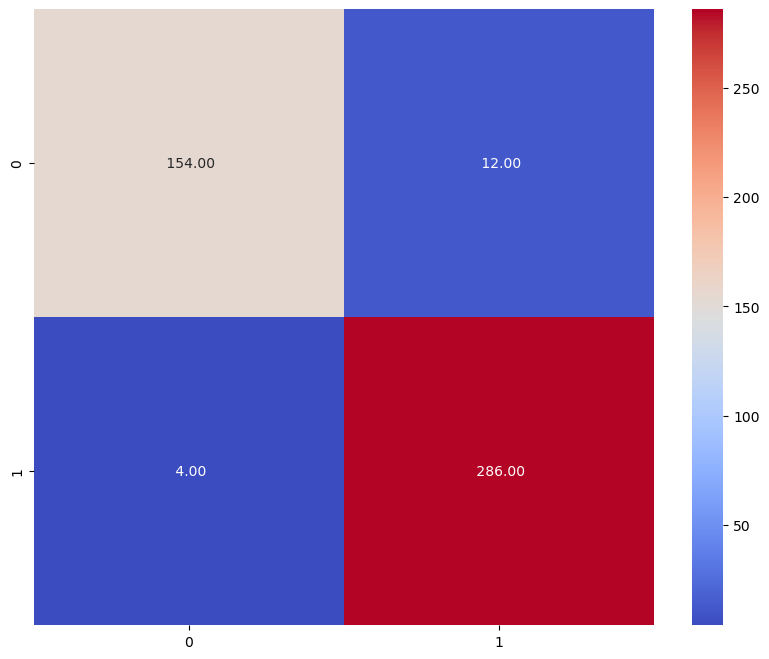

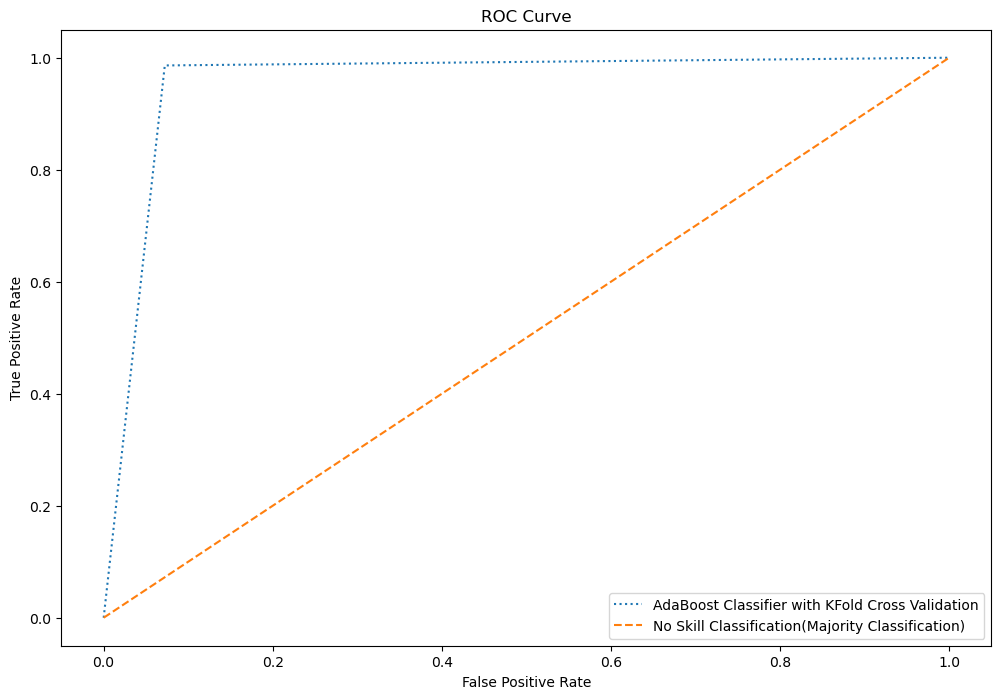


			Decision Tree: ROC AUC =  0.956958869962609 			


			No SKill: AUC ROC =  0.5 			


			Cross Validation Accuracy Scores: 		
 [0.92391304 0.94505495 0.89010989 0.94505495 0.87912088]

			Average K Folds Cross Validation Accuracy Score			
 0.916650740563784
              precision    recall  f1-score   support

           0       0.97      0.80      0.87       166
           1       0.89      0.99      0.94       290

    accuracy                           0.92       456
   macro avg       0.93      0.89      0.91       456
weighted avg       0.92      0.92      0.91       456



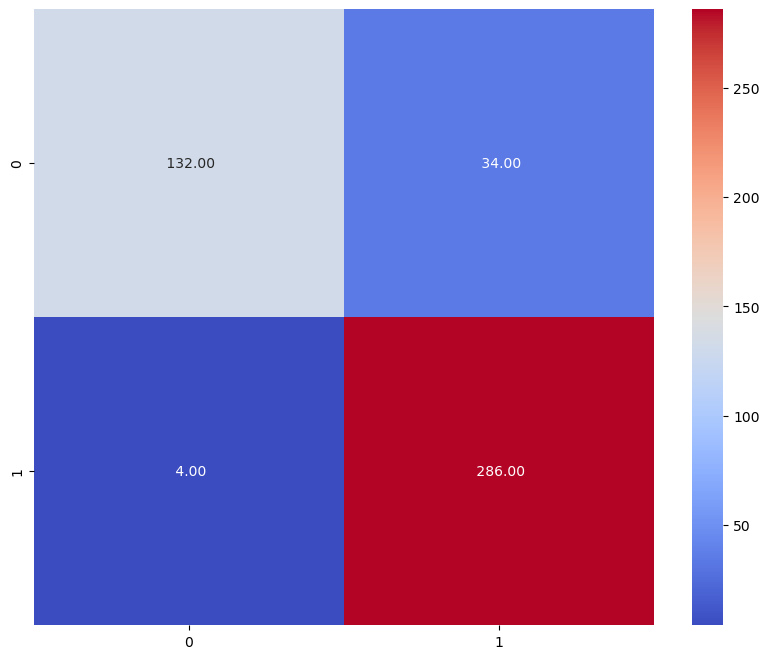

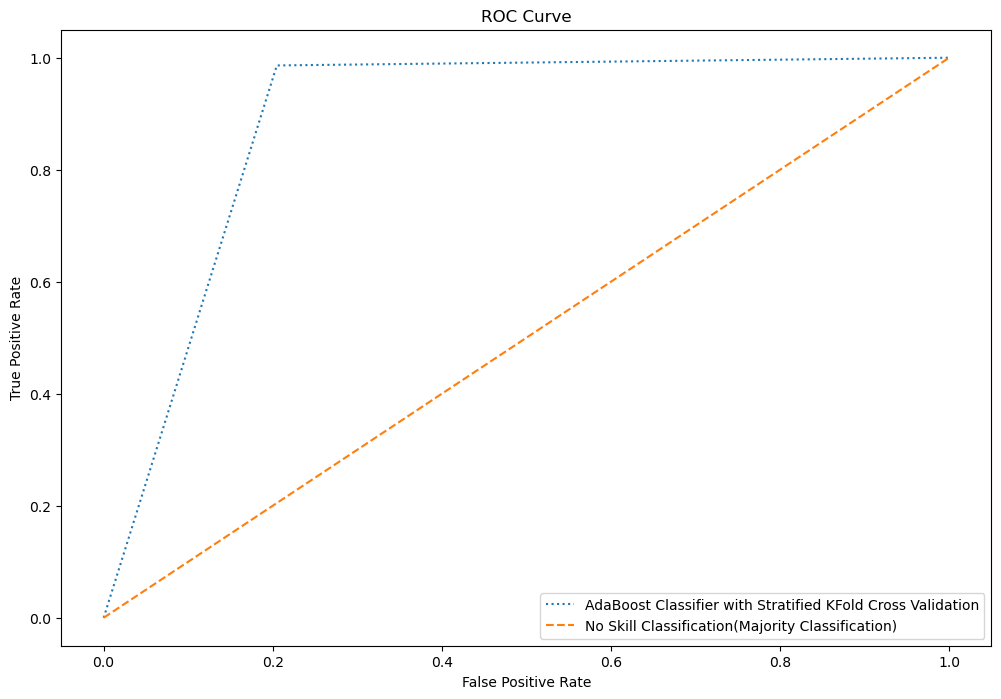


			AdaBoost Classifier: ROC AUC =  0.8906938097216452 			


			No SKill: AUC ROC =  0.5 			



In [31]:

from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

dt_b = AdaBoostClassifier(algorithm="SAMME.R", learning_rate=1.0, n_estimators=250, random_state= 42)
k_fold = KFold(n_splits = 5)
scores = cross_val_score(dt_b, X_test, y_test, cv = k_fold)
print("\n\t\t\tCross Validation Accuracy Scores: \t\t\n", scores)
print("\n\t\t\tAverage K Folds Cross Validation Accuracy Score\t\t\t\n", scores.mean())

from sklearn.metrics import classification_report
y_prd = cross_val_predict(dt_b, X_test, y_test, cv = k_fold)
print(classification_report(y_test, y_prd, labels = [0, 1]))

# Building the Confusion Matrix

from sklearn.metrics import confusion_matrix
corr_matrix = train.corr()
plt.figure(figsize=(10, 8))
conf_mat = confusion_matrix(y_test, y_prd)
sns.heatmap(conf_mat, annot = True, cmap = 'coolwarm', fmt = ' .2f')
plt.show()

# Plotting the ROC Curve

from sklearn.metrics import roc_curve

dt_fpr, dt_tpr, _ = roc_curve(y_test, y_prd)
ns_prob = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_prob)
plt.figure(figsize=(12, 8))
plt.plot(dt_fpr, dt_tpr, ls = ':',label = "AdaBoost Classifier with KFold Cross Validation")
plt.plot(ns_fpr, ns_tpr, ls = '--', label = "No Skill Classification(Majority Classification)")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


from sklearn.metrics import roc_auc_score
auc_dt = roc_auc_score(y_test, y_prd)
print("\n\t\t\tDecision Tree: ROC AUC = ", auc_dt, '\t\t\t\n')
auc_ns = roc_auc_score(y_test, ns_prob)
print("\n\t\t\tNo SKill: AUC ROC = ", auc_ns, '\t\t\t\n')

# Implementing a Decision Tree Classifier with Best Parameters using Stratified K Fold Split

from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict

dt_b = SVC(random_state = 42, cache_size=200, degree=2, kernel='rbf', shrinking=True, tol = 0.01)
sk_fold = StratifiedKFold(n_splits = 5)
scores = cross_val_score(dt_b, X_test, y_test, cv = sk_fold)
print("\n\t\t\tCross Validation Accuracy Scores: \t\t\n", scores)
print("\n\t\t\tAverage K Folds Cross Validation Accuracy Score\t\t\t\n", scores.mean())

from sklearn.metrics import classification_report
y_prd = cross_val_predict(dt_b, X_test, y_test, cv = sk_fold)
print(classification_report(y_test, y_prd, labels = [0, 1]))

# Building the Confusion Matrix

from sklearn.metrics import confusion_matrix
corr_matrix = train.corr()
plt.figure(figsize=(10, 8))
conf_mat = confusion_matrix(y_test, y_prd)
sns.heatmap(conf_mat, annot = True, cmap = 'coolwarm', fmt = ' .2f')
plt.show()

from sklearn.metrics import roc_curve

dt_fpr, dt_tpr, _ = roc_curve(y_test, y_prd)
ns_prob = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_prob)
plt.figure(figsize=(12, 8))
plt.plot(dt_fpr, dt_tpr, ls = ':',label = "AdaBoost Classifier with Stratified KFold Cross Validation")
plt.plot(ns_fpr, ns_tpr, ls = '--', label = "No Skill Classification(Majority Classification)")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


from sklearn.metrics import roc_auc_score
auc_dt = roc_auc_score(y_test, y_prd)
print("\n\t\t\tAdaBoost Classifier: ROC AUC = ", auc_dt, '\t\t\t\n')
auc_ns = roc_auc_score(y_test, ns_prob)
print("\n\t\t\tNo SKill: AUC ROC = ", auc_ns, '\t\t\t\n')





*Using Robust Scaler*

In [32]:
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
rscaler = RobustScaler()
Pipeline = Pipeline([('scaler', rscaler), ('ada', ada)])

#Paramerters for Grid Search
parameters = {
    'ada__n_estimators' : [50, 100, 150, 200, 250, 60, 70],
    'ada__learning_rate' : [1.0, 1.5, 2.0, 4.0, 3.5, 2.5],
    'ada__algorithm' : ['SAMME', 'SAMME.R'],
}
grid_pipe = GridSearchCV(Pipeline, parameters)
grid_pipe.fit(X_train, y_train)
grid_pipe.best_params_

{'ada__algorithm': 'SAMME.R',
 'ada__learning_rate': 1.0,
 'ada__n_estimators': 250}


			Cross Validation Accuracy Scores: 		
 [0.95652174 0.96703297 0.96703297 0.95604396 0.97802198]

			Average K Folds Cross Validation Accuracy Score			
 0.9649307214524606
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       166
           1       0.96      0.99      0.97       290

    accuracy                           0.96       456
   macro avg       0.97      0.96      0.96       456
weighted avg       0.97      0.96      0.96       456



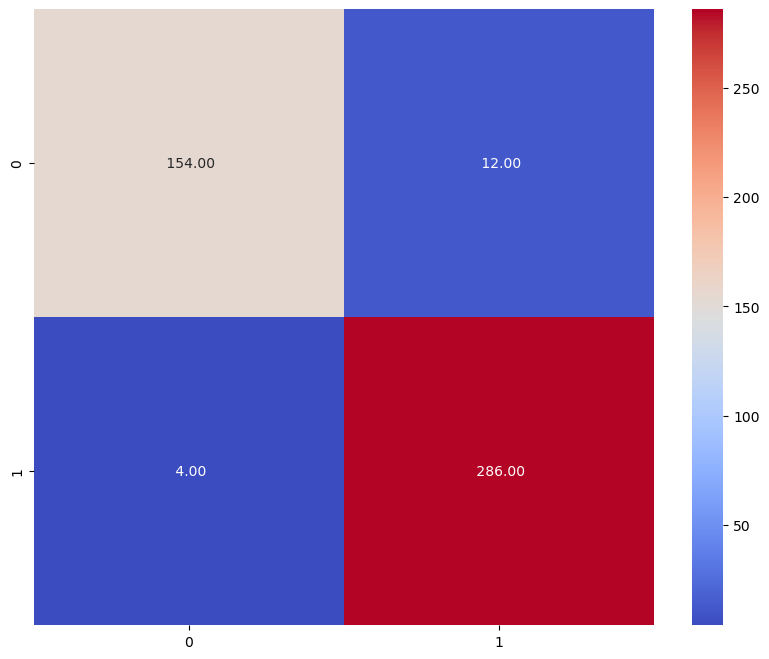

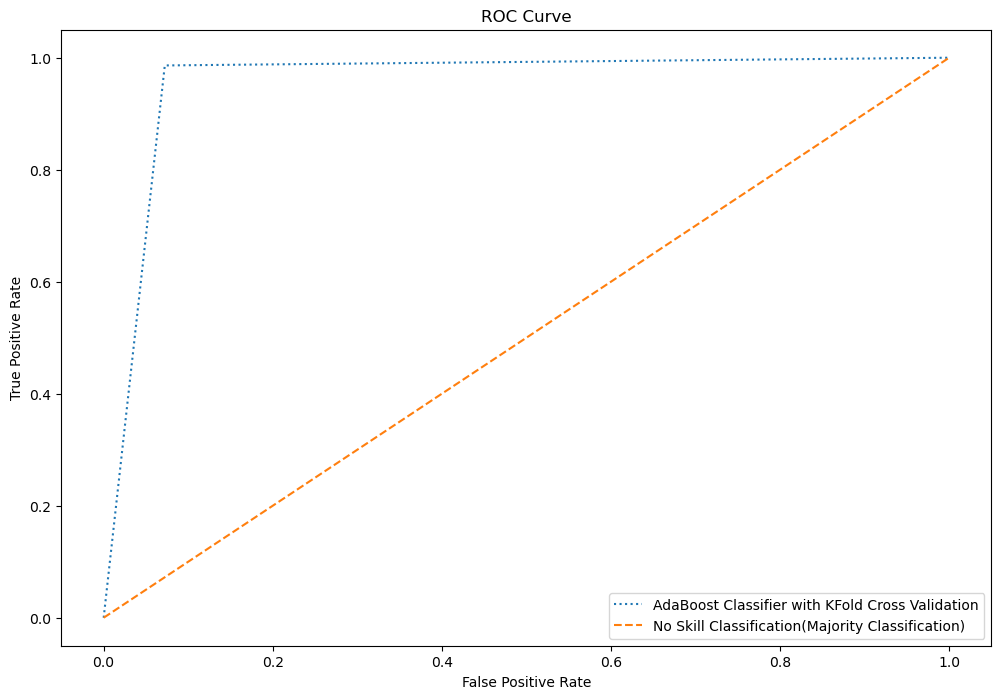


			Decision Tree: ROC AUC =  0.956958869962609 			


			No SKill: AUC ROC =  0.5 			


			Cross Validation Accuracy Scores: 		
 [0.92391304 0.94505495 0.89010989 0.94505495 0.87912088]

			Average K Folds Cross Validation Accuracy Score			
 0.916650740563784
              precision    recall  f1-score   support

           0       0.97      0.80      0.87       166
           1       0.89      0.99      0.94       290

    accuracy                           0.92       456
   macro avg       0.93      0.89      0.91       456
weighted avg       0.92      0.92      0.91       456



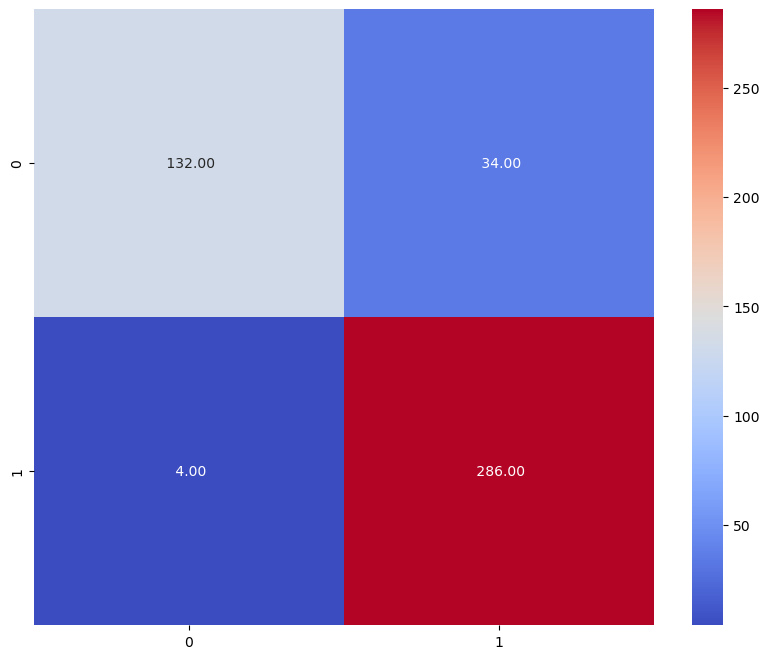

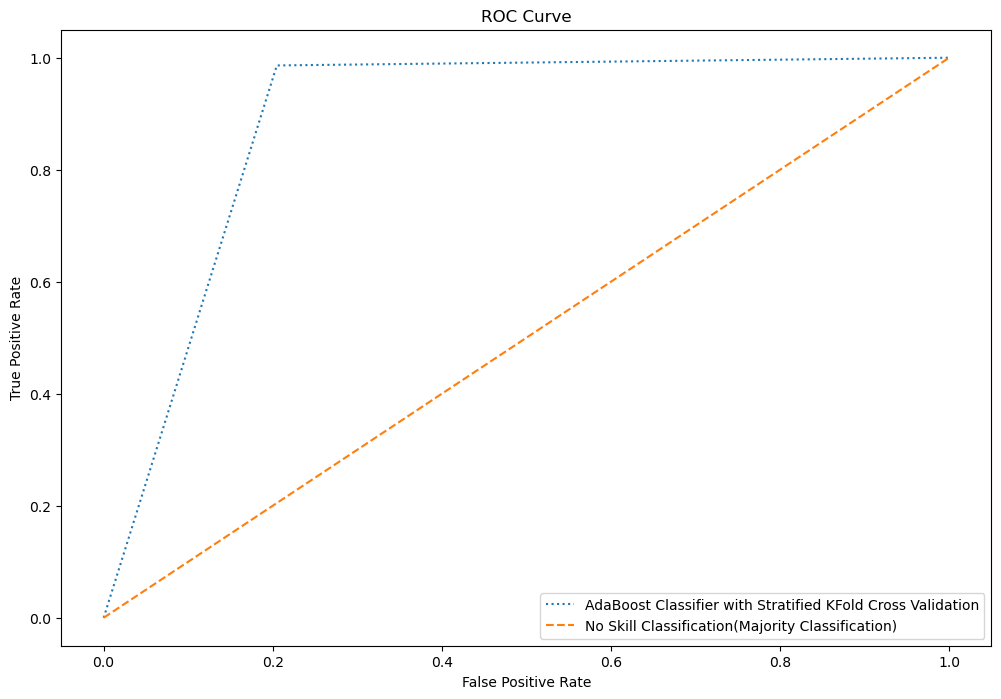


			AdaBoost Classifier: ROC AUC =  0.8906938097216452 			


			No SKill: AUC ROC =  0.5 			



In [33]:

from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

dt_b = AdaBoostClassifier(algorithm="SAMME.R", learning_rate=1.0, n_estimators=250, random_state= 42)
k_fold = KFold(n_splits = 5)
scores = cross_val_score(dt_b, X_test, y_test, cv = k_fold)
print("\n\t\t\tCross Validation Accuracy Scores: \t\t\n", scores)
print("\n\t\t\tAverage K Folds Cross Validation Accuracy Score\t\t\t\n", scores.mean())

from sklearn.metrics import classification_report
y_prd = cross_val_predict(dt_b, X_test, y_test, cv = k_fold)
print(classification_report(y_test, y_prd, labels = [0, 1]))

# Building the Confusion Matrix

from sklearn.metrics import confusion_matrix
corr_matrix = train.corr()
plt.figure(figsize=(10, 8))
conf_mat = confusion_matrix(y_test, y_prd)
sns.heatmap(conf_mat, annot = True, cmap = 'coolwarm', fmt = ' .2f')
plt.show()

# Plotting the ROC Curve

from sklearn.metrics import roc_curve

dt_fpr, dt_tpr, _ = roc_curve(y_test, y_prd)
ns_prob = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_prob)
plt.figure(figsize=(12, 8))
plt.plot(dt_fpr, dt_tpr, ls = ':',label = "AdaBoost Classifier with KFold Cross Validation")
plt.plot(ns_fpr, ns_tpr, ls = '--', label = "No Skill Classification(Majority Classification)")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


from sklearn.metrics import roc_auc_score
auc_dt = roc_auc_score(y_test, y_prd)
print("\n\t\t\tDecision Tree: ROC AUC = ", auc_dt, '\t\t\t\n')
auc_ns = roc_auc_score(y_test, ns_prob)
print("\n\t\t\tNo SKill: AUC ROC = ", auc_ns, '\t\t\t\n')

# Implementing a Decision Tree Classifier with Best Parameters using Stratified K Fold Split

from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict

dt_b = SVC(random_state = 42, cache_size=200, degree=2, kernel='rbf', shrinking=True, tol = 0.01)
sk_fold = StratifiedKFold(n_splits = 5)
scores = cross_val_score(dt_b, X_test, y_test, cv = sk_fold)
print("\n\t\t\tCross Validation Accuracy Scores: \t\t\n", scores)
print("\n\t\t\tAverage K Folds Cross Validation Accuracy Score\t\t\t\n", scores.mean())

from sklearn.metrics import classification_report
y_prd = cross_val_predict(dt_b, X_test, y_test, cv = sk_fold)
print(classification_report(y_test, y_prd, labels = [0, 1]))

# Building the Confusion Matrix

from sklearn.metrics import confusion_matrix
corr_matrix = train.corr()
plt.figure(figsize=(10, 8))
conf_mat = confusion_matrix(y_test, y_prd)
sns.heatmap(conf_mat, annot = True, cmap = 'coolwarm', fmt = ' .2f')
plt.show()

from sklearn.metrics import roc_curve

dt_fpr, dt_tpr, _ = roc_curve(y_test, y_prd)
ns_prob = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_prob)
plt.figure(figsize=(12, 8))
plt.plot(dt_fpr, dt_tpr, ls = ':',label = "AdaBoost Classifier with Stratified KFold Cross Validation")
plt.plot(ns_fpr, ns_tpr, ls = '--', label = "No Skill Classification(Majority Classification)")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


from sklearn.metrics import roc_auc_score
auc_dt = roc_auc_score(y_test, y_prd)
print("\n\t\t\tAdaBoost Classifier: ROC AUC = ", auc_dt, '\t\t\t\n')
auc_ns = roc_auc_score(y_test, ns_prob)
print("\n\t\t\tNo SKill: AUC ROC = ", auc_ns, '\t\t\t\n')





# Techinal Summary

Three Classificaton Models were used
* Decision Tree
* SVM
* AdaBoost

The Decision Tree Classifier gave the worst performance, SVM was the second best and the AdaBoost Classifier gave the best perfomance. The Perfomance metrics for evaluations used are: precision ,Recall, Accuarcy, Macro Average Precision and Recall, Micro Averaged Precision and Recall, Confusion Matrix and ROC AUC Curve.